# Intro to Data Visualisations

1. Overviews of charts
        A. Bar
        B. Histogram
        C. Scatterplot
        D. Line
 

 2. Descriptive findings about the time of day purchases are made
 3. Distribution of loyalty flags
 4. Difference in expenditure depending on the hour of day
 5. Connection between age and number of dependants
 6. Connection between age and spending power (income)
 7. Exporting visualisations

In [4]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [5]:
# Path
path = r"C:\Users\Natalia\Documents\Instacart Basket Analysis"

In [6]:
#import data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [7]:
#checking output 
df.sample(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,dependants_loc,fam_status,income
26959398,3058592,26281,4,6,0,26.0,46802,6,0,both,...,26.0,Non-frequent customer,Male,IA,30,2019-01-23,2,Has dependants,married,30552
14831766,1053548,184030,29,1,11,9.0,44632,14,1,both,...,7.0,Frequent customer,Female,NE,34,2017-05-14,3,Has dependants,married,62629
23222147,2071020,122959,2,5,16,14.0,39046,3,0,both,...,14.0,Regular customer,Female,WV,52,2018-07-03,2,Has dependants,married,107550
32346061,3407811,28643,12,2,16,6.0,10339,3,1,both,...,6.0,Frequent customer,Male,OR,40,2017-03-05,0,No dependants,single,52460
6417321,2145258,59843,3,0,15,7.0,18979,6,0,both,...,11.0,Regular customer,Female,ME,56,2017-05-02,0,No dependants,single,147776


## A. Bar Chart

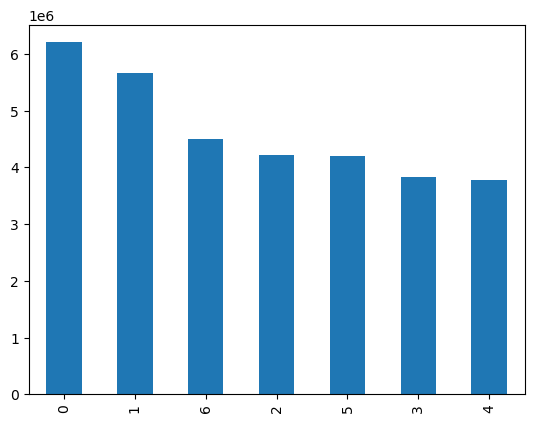

In [8]:
#creating a bar chart for order_day_of_week column
bar1 = df['orders_day_of_week'].value_counts().plot.bar()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

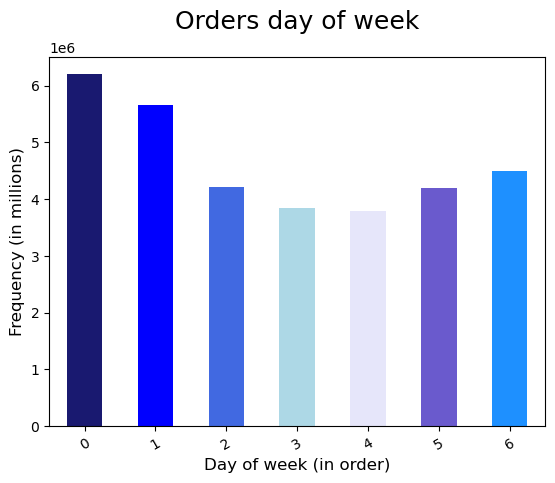

In [9]:
bar_order_day_of_week = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['midnightblue', 'blue', 'royalblue', 'lightblue', 'lavender', 'slateblue', 'dodgerblue'])
plt.title('Orders day of week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of week (in order)',  fontsize = 12)
plt.xticks(rotation=30)

## B. Histogram

Text(0.5, 0, 'Price of item (in USD)')

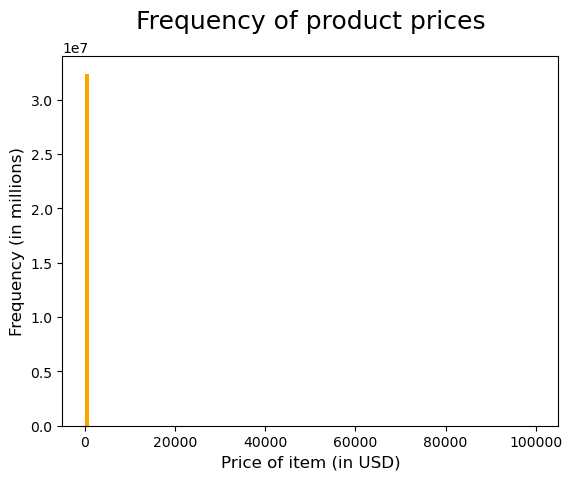

In [10]:
#creating a histogram for prices 
hist_prices = df['prices'].plot.hist(bins = 100, color = ['orange'])
plt.title('Frequency of product prices', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Price of item (in USD)',  fontsize = 12)

## C. Scatterplot

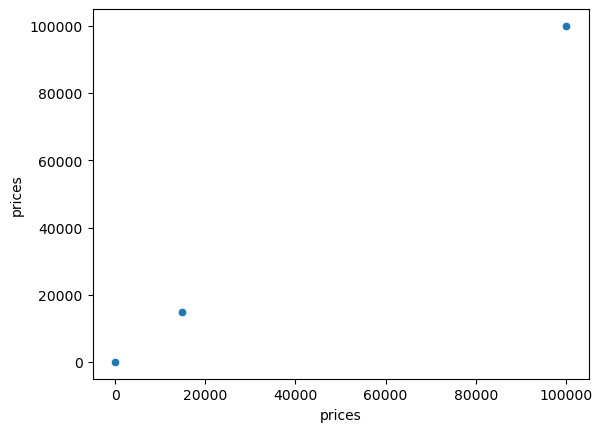

In [11]:
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df)

# Creating a Sample

Creating a subset which is representative of my entire dataset. 

In [12]:
#assining each row in my dataset a random value between 0 and 1, then creating a logical test to check each number against a value of 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

Now we divide all of our rows into one of two samples

In [14]:
#assigning 70% of the sample in df_big
big = df[dev]

In [15]:
#assigning 30% of the sample in df_small
small = df[~dev]

In [16]:
len(df)

32404859

In [17]:
#checking output by comparing the shap of each sample to the whoe
len(big) + len(small)

32404859

In [18]:
df_small = small[['orders_day_of_week','prices']]

## D. Line Chart

Text(0.5, 0, 'Day of week (in order)')

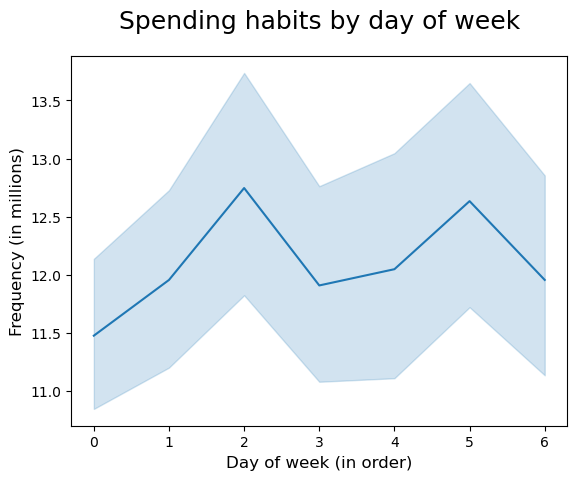

In [19]:
#create your line chart
line_order_day_of_week = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')
plt.title('Spending habits by day of week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of week (in order)',  fontsize = 12)

# 2. Provide the Instacart senior stakeholders with descriptive findings about sales. Create a hisotgram of the "order_hour_of_day" column

In a markdown cell beneath your histogram, describe what the histogram demonstrates

Text(0.5, 0, 'Order of day, 24 hour clock')

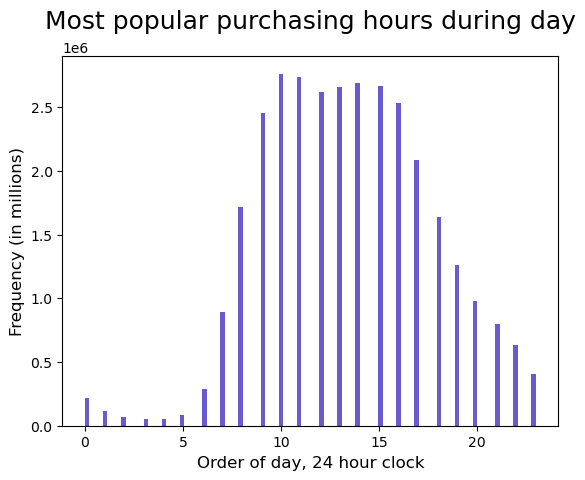

In [20]:
#creating a histogram for order
hist_ords_hour = df['order_hour_of_day'].plot.hist(bins = 100, color = ['slateblue'])
plt.title('Most popular purchasing hours during day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Order of day, 24 hour clock',  fontsize = 12)

This histogram shows the distribution of purchases made during the day, by hour. You can see that the most popular times to purchase are between 9am 5pm

# 3. The Marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the "loyalty_flag" columns

In [21]:
#checking max orders
df['max_order'].value_counts(ascending = True)

1           5
2           6
96      40453
98      44587
97      44949
       ...   
7      803979
9      810213
6      811396
8      811843
99    1171333
Name: max_order, Length: 99, dtype: int64

Text(0.5, 0, 'No. of orders')

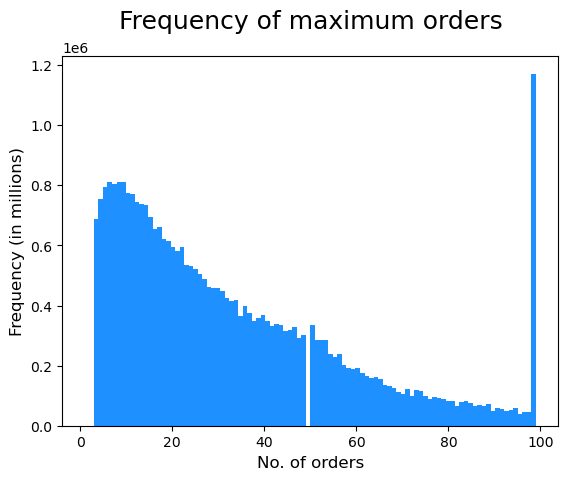

In [22]:
#creating a histogram for max order 
hist_freq_max_order = df['max_order'].plot.hist(bins = 100, color = ['dodgerblue'])
plt.title('Frequency of maximum orders', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('No. of orders',  fontsize = 12)

In [23]:
#checking numbers within loyalty_flag column
df['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

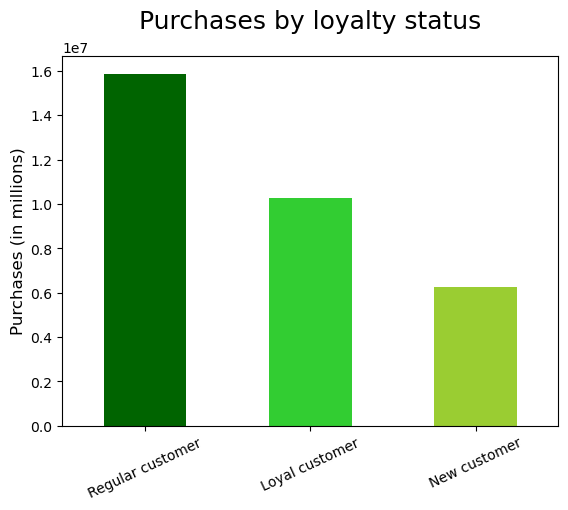

In [24]:
#creating a bar chart for order_day_of_week column
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color = ['darkgreen', 'limegreen', 'yellowgreen'])
plt.title('Purchases by loyalty status', fontsize = 18, pad=20)
plt.ylabel('Purchases (in millions)', fontsize = 12)
plt.xticks(rotation=25)

# 4. Check whether there's a difference in expenditure (the "prices" column) depending on the hour of day

To check this, you need to use an accurate sample for your line chart

In [25]:
#first we need to create a subset dataframe 
df_ohod = small[['order_hour_of_day','prices']]

In [26]:
#checking output 
df_ohod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int8   
 1   prices             float32
dtypes: float32(1), int8(1)
memory usage: 378.5 MB


In [27]:
df_ohod.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


([<matplotlib.axis.XTick at 0x2909f3962e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

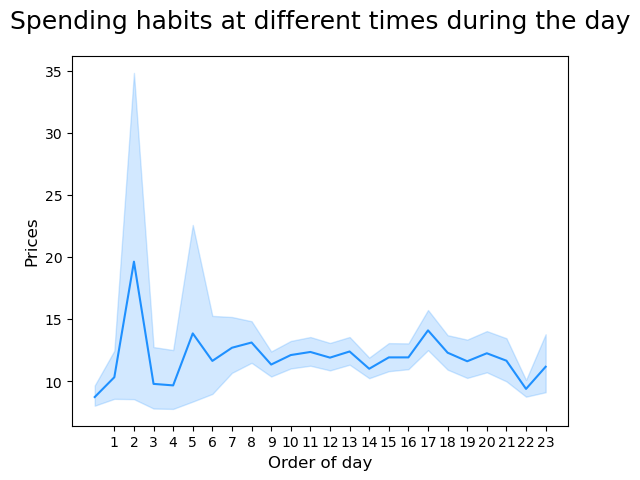

In [28]:
#creating a line chart of hour and prices
line_hour_of_day = sns.lineplot(data = df_ohod, x = 'order_hour_of_day', y = 'prices', color = 'dodgerblue')
plt.title('Spending habits at different times during the day', fontsize = 18, pad=20)
plt.ylabel('Prices', fontsize = 12)
plt.xlabel('Order of day',  fontsize = 12)
plt.xticks(range(1, 24))

# 5. Determine whether there's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependants 

In a markdown cell beneath your line chart, describe what the line chart chows

In [29]:
#creating a subset for the line chart
df_age_dependants = small[['age','n_dependants']]

In [30]:
#checking output 
df_age_dependants.sample(5)

,age,n_dependants
5252724,33,2
17726534,25,2
24889608,25,3
9999925,78,1
24074278,78,2


In [31]:
df_age_dependants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column        Dtype
---  ------        -----
 0   age           int8 
 1   n_dependants  int8 
dtypes: int8(2)
memory usage: 350.7 MB


In [33]:
df_age_dependants.describe()

,age,n_dependants
count,9.721098e+06,9.721098e+06
mean,4.946128e+01,1.502105e+00
std,1.848547e+01,1.118703e+00
min,1.800000e+01,0.000000e+00
25%,3.300000e+01,1.000000e+00
50%,4.900000e+01,2.000000e+00
75%,6.500000e+01,3.000000e+00
max,8.100000e+01,3.000000e+00


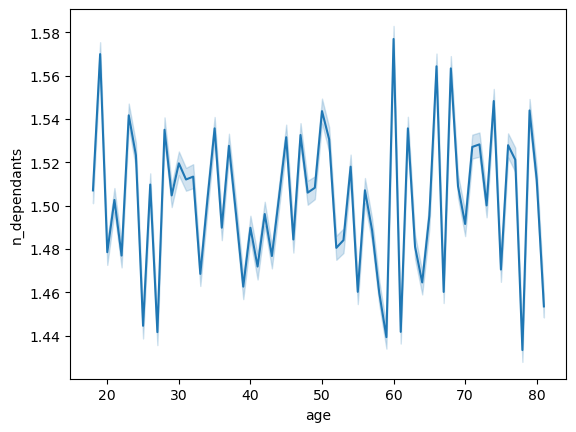

In [34]:
#creating line chart 
line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'n_dependants')

The chart shows age vs number of dependants. The results are pretty inconclusive

# 6. Explore whether there's a connection between age and spending power (income). To visualise this relationship, create a scatterplot using the sns.scatterplot() function

In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [35]:
#creating a dataframe for my scatterplot
df_age_income = small[['age','income']]

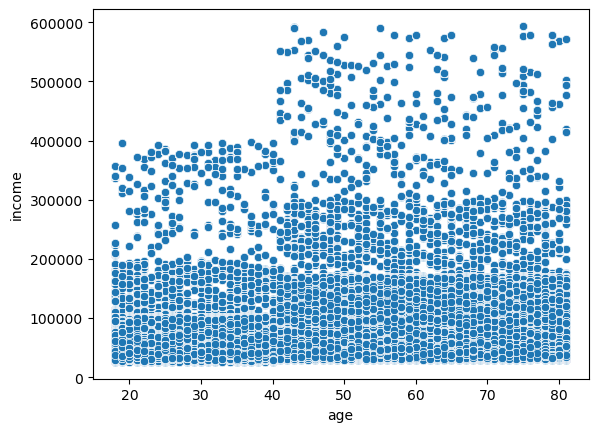

In [36]:
#creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

The scatterplot shows the relationship between age (x-axis) and income (y-axis). We can see positive correlation between age and income in that the older you get, the higher your income. I do think the big step up at age 40 is interesting, I would have expected to see a more consistent and gradual increase and I do think it's strange that no one under the age of 40 earns more than 400,000.

For the purpose of this analysis however, Instacart would be able to target those over 40 as those with "spending power".

# 7. Exporting Visualisations 

In [38]:
bar_order_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_order_dow24.02.png'))

In [39]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_prices24.02.png'))

In [40]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_prices24.02.png'))

In [41]:
line_order_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_dow24.02.png'))

In [42]:
hist_ords_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_hour_day24.02.png'))

In [43]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_loyalty24.02.png'))

In [44]:
line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_hour_day24.02.png'))

In [45]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_age_dependants24.02.png'))

In [46]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_age_income24.02.png'))

In [47]:
line_order_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_order_day_of_week.07.png'))

In [48]:
hist_freq_max_order.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_freq_max_order.07.png'))